In [1]:
import numpy as np

$$\left (X_{(n)}, \quad \frac{X_{(n)}}{\varepsilon^{1/n}}\right)$$

In [17]:
popular_confidence = [0.95, 0.99]
confidence = 0.95

In [100]:
def interval(n_samples, n_intervals, true_theta=1.0, confidence=0.95, interval_length=False):
    '''
    Считаем доверительный интервал для разных параметров:
        n = размер выборки
        true_theta: X ~ U[0, true_theta]
        confidence:  уровень значимости 
        n_intervals: количество интервалов 
        interval_length:  bool if True возвращает интервал 

    Возвращаем:
        вероятность, что доверительный интервал накрывает параметр true_theta
    '''
    one_minus = 1 - confidence
    propability_count = 0
    for i in range(n_intervals):
        X = np.random.uniform(low=0.0, high=true_theta, size=n_samples) # n - размер выборки
        low, high = np.max(X), np.max(X)/(one_minus)**(1/n_samples)
        interval = [low, high]
        if low <= true_theta <= high: propability_count += 1
    if interval_length: return high - low
    return propability_count / n_intervals

In [42]:
for true_theta in [1.0, 2.0, 5.0]:
    for confidence_level in [0.95, 0.99]:
        probability = interval(n_samples=10000, n_intervals=100000, 
                               true_theta=true_theta, confidence=confidence_level)
        print(f"Params: true_theta {true_theta}  Probability vs confidence level : {probability:.{2}} | {confidence_level}")
    print('-------------------------------------------------------')

Params: true_theta 1.0  Probability vs confidence level : 0.95 | 0.95
Params: true_theta 1.0  Probability vs confidence level : 0.99 | 0.99
-------------------------------------------------------
Params: true_theta 2.0  Probability vs confidence level : 0.95 | 0.95
Params: true_theta 2.0  Probability vs confidence level : 0.99 | 0.99
-------------------------------------------------------
Params: true_theta 5.0  Probability vs confidence level : 0.95 | 0.95
Params: true_theta 5.0  Probability vs confidence level : 0.99 | 0.99
-------------------------------------------------------


Чтобы продемонстрировать, что данный интервал является доверительныы с указанной вероятностью, я построила доверительные интервалы для разных уровней значимости $(0.95, 0.99)$ и разных истинных параметров $\theta$ распределения $U[0, \theta]$. Как мы видим, вероятность, что интервал покрывает истинный параметр действительно равна указанной.

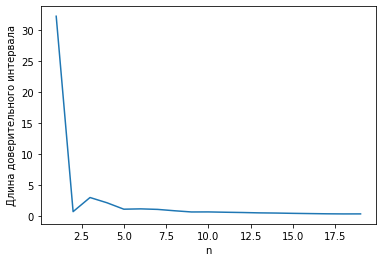

In [114]:
import matplotlib.pyplot as plt
samples_size = np.arange(1, 20)
intervals = []
for n in samples_size:
    interval_length = interval(n_samples=n, n_intervals=1, 
                         true_theta=2.0, confidence=0.95,
                         interval_length=True)
    intervals.append(interval_length)



intervals = np.array(intervals)
plt.plot(samples_size, intervals)
# ax.set_title('fill between y1 and y2')
plt.ylabel('Длина доверительного интервала')
plt.xlabel('n')
plt.show()

Как и ожидалось, длина доверительного интервала убывает с ростом n, можно так же показать, 
что она убывает, если мы уменьшаем уровень значимости,(или вероятнось что интервал накроет истинный параметр), но для этого нет разумных графиков.
